In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
#dataset prep
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [8]:
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


0


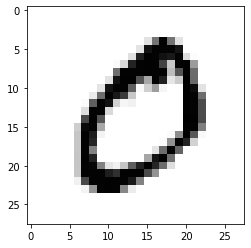

In [7]:
#sample image display
image_index = 1 
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

In [9]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [10]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [11]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2083 - accuracy: 0.9372
Epoch 2/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0844 - accuracy: 0.9744
Epoch 3/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0612 - accuracy: 0.9808
Epoch 4/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0445 - accuracy: 0.9856
Epoch 5/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0381 - accuracy: 0.9876
Epoch 6/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0314 - accuracy: 0.9897
Epoch 7/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0256 - accuracy: 0.9915
Epoch 8/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0235 - accuracy: 0.9920
Epoch 9/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0186 - accuracy: 0.9935
Epoch 10/15
1875/1875 [==============================] - 31s 16m

In [12]:
#Evaluating the model
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0721 - accuracy: 0.9852


[0.0721491202712059, 0.9851999878883362]

1


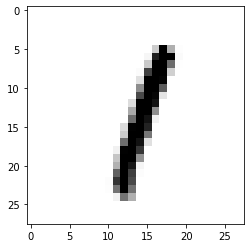

In [14]:
image_index = 5
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())